<a href="https://colab.research.google.com/github/HebahAlshamlan/Covid-19/blob/master/Covid_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset :
Covid-19 : https://github.com/ieee8023/covid-chestxray-dataset
Normal : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/data#

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [0]:
DATADIR = "dataset"

CATEGORIES = ["Covid", "NotCovid"]

Covid 41591_2020_819_Fig1_HTML.webp-day5.png 



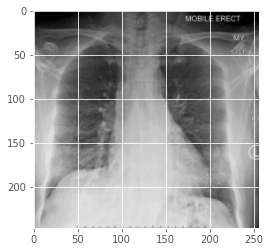

Covid 1-s2.0-S1684118220300682-main.pdf-002-a2.png 



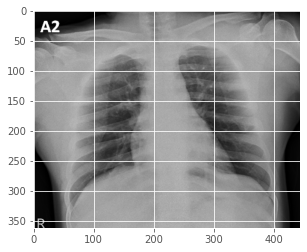

Covid 23E99E2E-447C-46E5-8EB2-D35D12473C39.png 



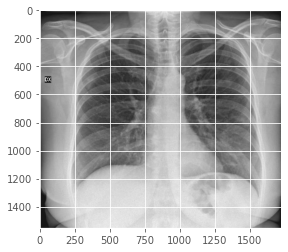

Covid 7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg 



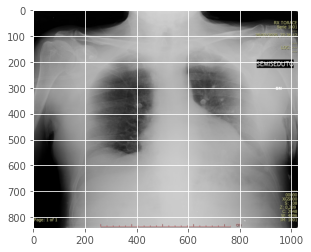

Covid ciaa199.pdf-001-a.png 



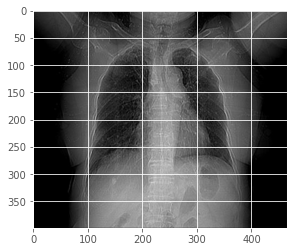

Covid radiol.2020200490.fig3.jpeg 



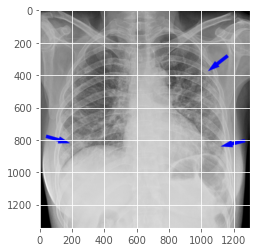

Covid lancet-case2a.jpg 



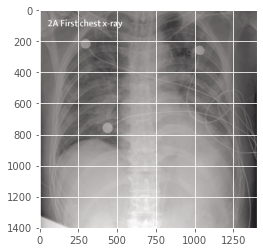

Covid 1-s2.0-S1684118220300608-main.pdf-002.jpg 



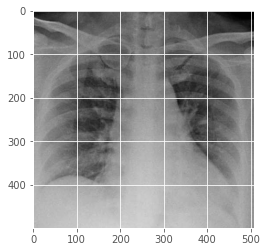

Covid 5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg 



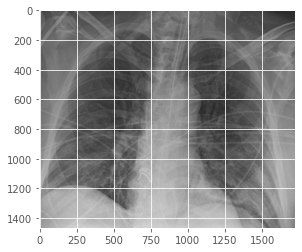

Covid ryct.2020200034.fig2.jpeg 



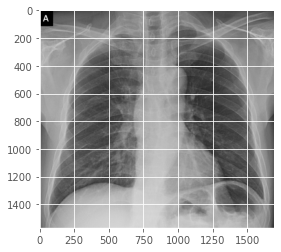

Covid 80446565-E090-4187-A031-9D3CEAA586C8.jpeg 



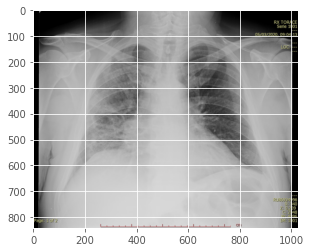

Covid E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg 



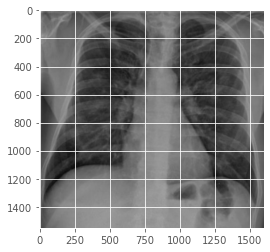

Covid 171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg 



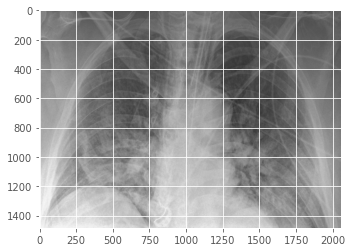

Covid 1-s2.0-S1684118220300682-main.pdf-003-b2.png 



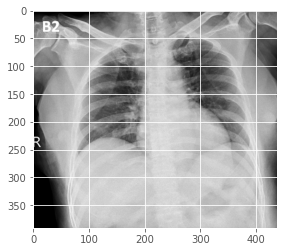

Covid covid-19-pneumonia-12.jpg 



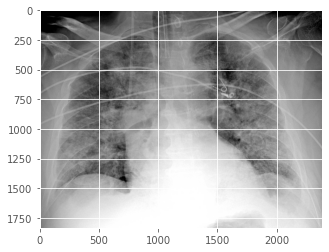

Covid nejmc2001573_f1a.jpeg 



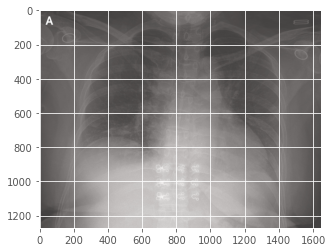

Covid lancet-case2b.jpg 



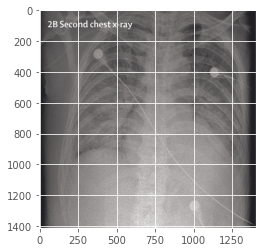

Covid 1-s2.0-S0929664620300449-gr2_lrg-a.jpg 



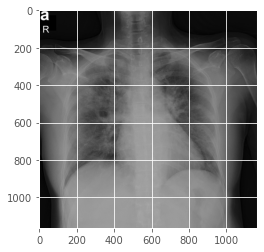

Covid radiopedia-covid-19-pneumonia-2.jpg 



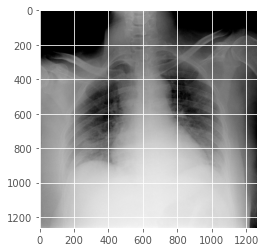

Covid nejmoa2001191_f4.jpeg 



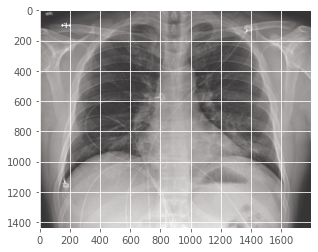

Covid C6EA0BE5-B01E-4113-B194-18D956675E25.jpeg 



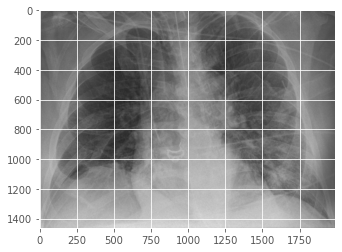

Covid auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg 



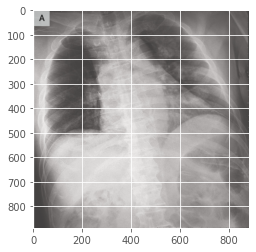

Covid ryct.2020200028.fig1a.jpeg 



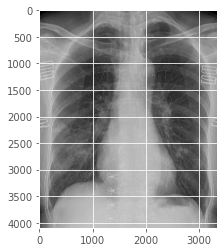

Covid covid-19-pneumonia-15-PA.jpg 



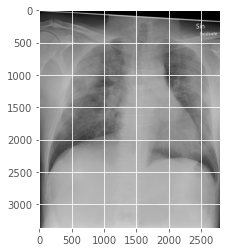

Covid auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg 



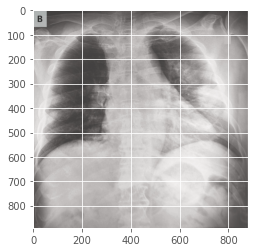

Covid 41591_2020_819_Fig1_HTML.webp-day10.png 



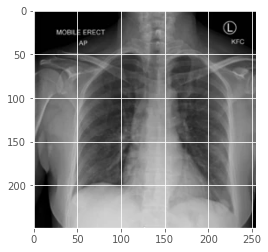

Covid 1-s2.0-S0929664620300449-gr2_lrg-b.jpg 



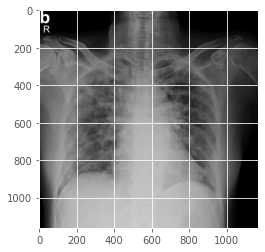

Covid auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg 



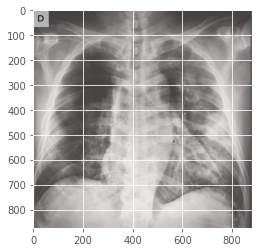

Covid 93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg 



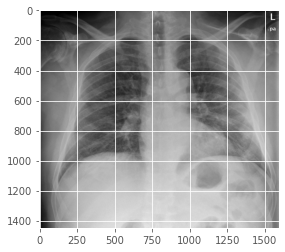

Covid nejmoa2001191_f3-PA.jpeg 



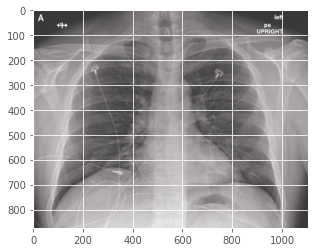

Covid 1-s2.0-S0140673620303706-fx1_lrg.jpg 



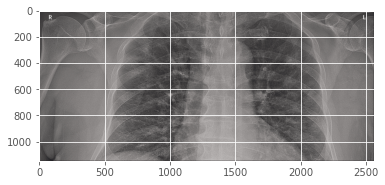

Covid 7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png 



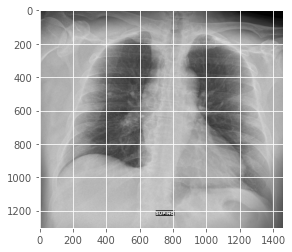

Covid nejmc2001573_f1b.jpeg 



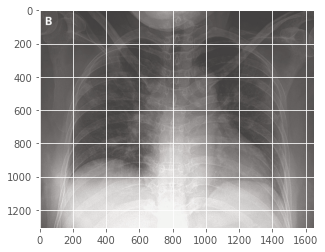

Covid nejmoa2001191_f1-PA.jpeg 



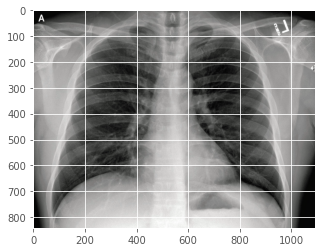

Covid ciaa199.pdf-001-b.png 



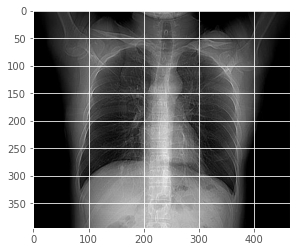

Covid 1-s2.0-S1684118220300682-main.pdf-003-b1.png 



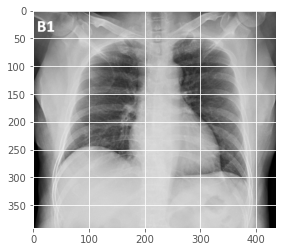

Covid 1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg 



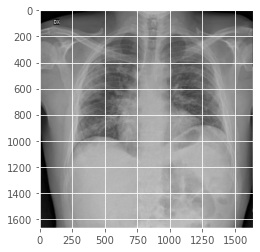

Covid gr1_lrg-a.jpg 



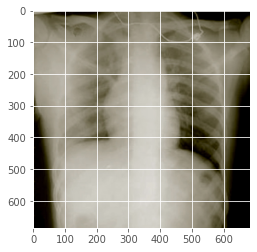

Covid auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg 



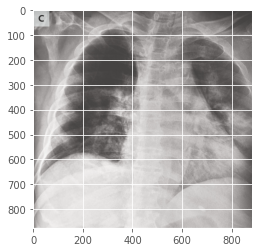

Covid 5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg 



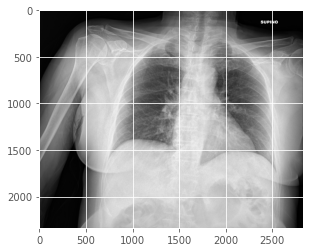

Covid 7E335538-2F86-424E-A0AB-6397783A38D0.jpeg 



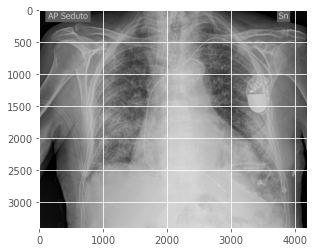

Covid ryct.2020200034.fig5-day7.jpeg 



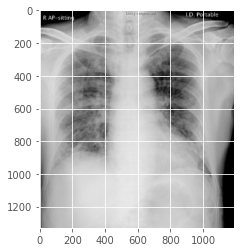

Covid F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg 



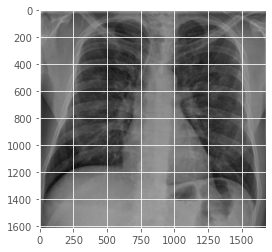

Covid FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg 



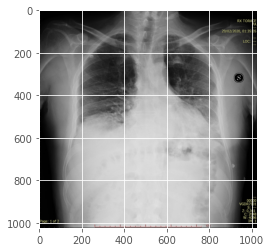

Covid nCoV-radiol.2020200269.fig1-day7.jpeg 



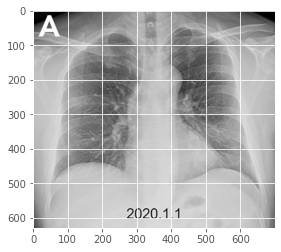

Covid nejmoa2001191_f5-PA.jpeg 



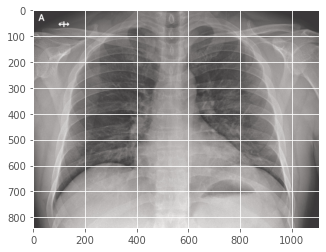

Covid 1-s2.0-S1684118220300682-main.pdf-002-a1.png 



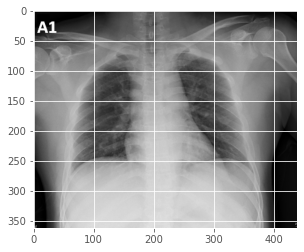

Covid 5e6dd879fde9502400e58b2f.jpeg 



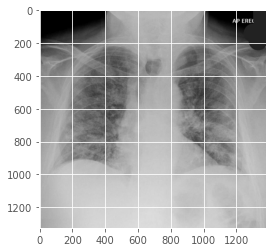

Covid CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg 



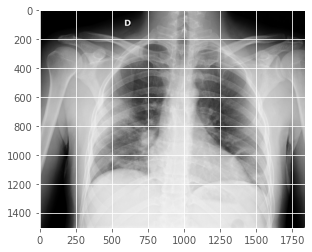

Covid gr1_lrg-b.jpg 



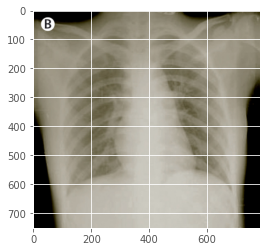

Covid F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg 



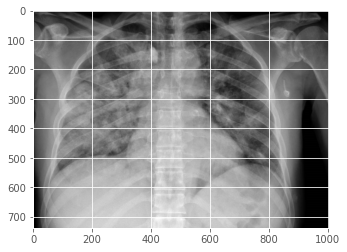

Covid 1-s2.0-S0929664620300449-gr2_lrg-d.jpg 



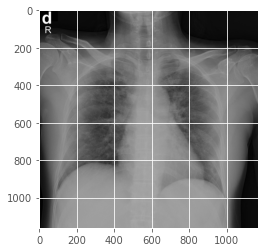

Covid .ipynb_checkpoints 



TypeError: ignored

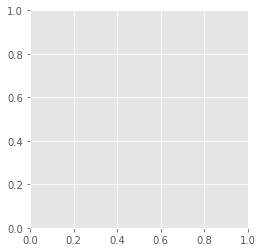

In [0]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):  
        print(category,img, "\n") 
        img_array = cv2.imread(os.path.join(path,img)) 
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

In [0]:
dataSet = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        print(path)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Covid+ 1=Covid-
        print(class_num)
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                dataSet.append([new_array, class_num])  # add this to our dataset
            except Exception as e:  # in the interest in keeping the output clean...
            #except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(dataSet))

  5%|▌         | 3/58 [00:00<00:02, 19.68it/s]

dataset/Covid
0


  0%|          | 0/57 [00:00<?, ?it/s]

OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 dataset/Covid/.ipynb_checkpoints
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
 dataset/Covid/.ipynb_checkpoints
dataset/NotCovid
1


100%|██████████| 57/57 [00:01<00:00, 44.72it/s]

114


In [0]:
len(dataSet)

114

In [0]:
import random

random.shuffle(dataSet)

In [0]:
for sample in dataSet[:10]:
    print(sample[1])

0
1
1
0
1
1
0
1
0
0


In [0]:

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

X = []
y = []

for features,label in dataSet:
  features = cv2.resize(features, (224, 224))
  X.append(features)
  y.append(label)
  # y = np.array(label)





# X = np.array(X).reshape(IMG_SIZE, IMG_SIZE)  / 255.0
# # X = np.array(X) / 255.0
# y = np.array(y)
# # X = X/255.0




In [0]:
X = np.array(X) / 255.0
y = np.array(y)
# X = X/255.0


### Create the *Training* and *Validation* datasets

---



In [0]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.20, stratify=y, random_state=42)


In [0]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [0]:
INIT_LR = 1e-3
EPOCHS = 20
BS = 8


model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))



opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



history = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)


[INFO] compiling model...
Epoch 1/20
11/11 [==============================] - 84s 8s/step - loss: 24.8158 - acc: 0.4699 - val_loss: 0.6921 - val_acc: 0.5217
Epoch 2/20
11/11 [==============================] - 82s 7s/step - loss: 0.6879 - acc: 0.6024 - val_loss: 0.6337 - val_acc: 0.7826
Epoch 3/20
11/11 [==============================] - 86s 8s/step - loss: 0.5820 - acc: 0.7045 - val_loss: 1.8726 - val_acc: 0.5217
Epoch 4/20
11/11 [==============================] - 77s 7s/step - loss: 0.5703 - acc: 0.7821 - val_loss: 0.7921 - val_acc: 0.6522
Epoch 5/20
11/11 [==============================] - 88s 8s/step - loss: 0.4982 - acc: 0.7727 - val_loss: 0.4670 - val_acc: 0.8261
Epoch 6/20
11/11 [==============================] - 77s 7s/step - loss: 0.4602 - acc: 0.8077 - val_loss: 0.3147 - val_acc: 0.9130
Epoch 7/20
11/11 [==============================] - 85s 8s/step - loss: 0.3058 - acc: 0.9091 - val_loss: 0.4372 - val_acc: 0.8696
Epoch 8/20
11/11 [==============================] - 81s 7s/step

In [0]:
# *** TO DO : testing & Prediction

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)


In [0]:
testY

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [0]:
predIdxs = model.predict(testX, batch_size=BS)

predIdxs


array([[1.4320016e-04],
       [8.0466270e-06],
       [2.0710826e-03],
       [4.2131925e-01],
       [9.9999779e-01],
       [9.9981874e-01],
       [9.9999875e-01],
       [9.9710047e-01],
       [1.0595209e-02],
       [1.0000000e+00]], dtype=float32)

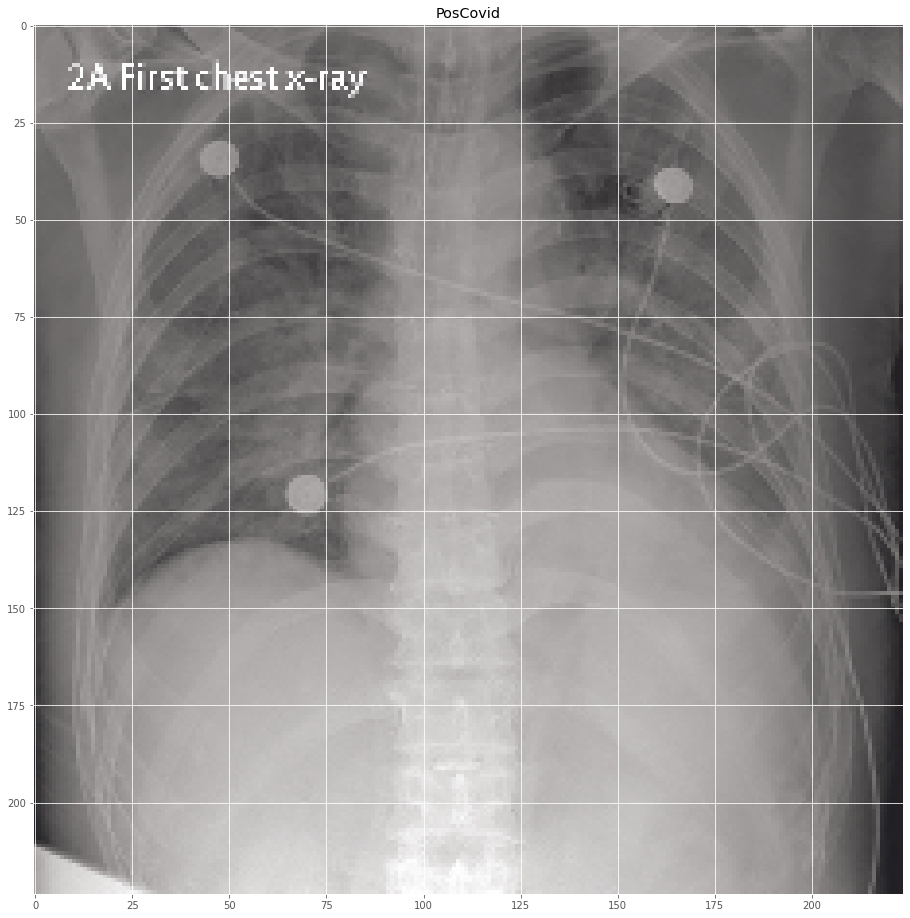

In [0]:
"""**Prediction**"""

import random
import cv2 

try:
    from google.colab.patches import cv2_imshow
except Exception:
    def cv2_imshow(mat):
        return cv2.imshow('img', mat)

def url_to_image(url):
    from skimage import io
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)


url = 'https://f.top4top.io/p_15387k6w01.jpg'

img = url_to_image(url)
img = resized = cv2.resize(img, (224,224)) 

_labels = np.array([
    'PosCovid',
    'NegCovid'])

    
def convertData(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(224*224*3).reshape((1,224,224,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))
data = convertData(img)
plt.imshow(img)
ret = model.predict(data, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if bestnum < ret[0]:
    bestclass = 0
else :
    bestclass = 1



plt.title(_labels[bestclass])
                                                  
plt.show()


In [0]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [1]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

NameError: ignored

In [0]:
"""**confusion matrix**"""

from sklearn.metrics import classification_report, confusion_matrix



y_pred = model.predict_classes(testX)
yTest_original = np.argmax(testY)

print("\n \n Recall and precision for each class")
print(classification_report(yTest_original, y_pred ))


 
 Recall and precision for each class


TypeError: ignored

In [0]:
#TO DO : try this model

model2.add ( Conv2D ( 32 , ( 3 , 3 ), padding= 'same' , activation= 'relu' ,
input_shape=input_shape ))
model2.add ( Conv2D ( 32 , ( 3 , 3 ), activation= 'relu' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), padding= 'same' , activation= 'relu' ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), activation= 'relu' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), padding= 'same' , activation= 'sigmoid' ))
model2.add ( Conv2D ( 64 , ( 3 , 3 ), activation= 'sigmoid' ))
model2.add ( MaxPooling2D ( pool_size= ( 2 , 2 )))
model2.add ( Dropout ( 0.5 ))
model2.add ( Flatten ())
model2.add ( Dense ( 512 , activation= 'relu' ))
model2.add ( Dropout ( 0.4 ))
model2.add ( Dense ( nClasses , activation= 'softmax' ))

model2.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)


In [0]:
# TO DO: try this model 

img_width = 224
img_height = 224
epochs = 100

base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, 
                                             input_shape=(img_width, img_height, 3))

output = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(2, activation='softmax')(output)

model1 = tf.keras.Model(inputs=base_model.input, outputs=output)

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 